# Machine Learning Exercise

### Fitting a Decision Tree Classifer

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

In [2]:
%matplotlib inline
matplotlib.style.use('ggplot')
pd.set_option("max_r",10)

**Exercise: Data Processing**
* Read titanic.csv into memory
* Choose the features you will use for your first model
* Check for missing values in all columns
* Fill in missing values with the mean value (resource: [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#cleaning-filling-missing-data) on missing values)
* Convert all variables to numeric for scikit learn
* Create a proxy variable representing whether the Spouse was on board
* Write data out to ../data/titanic_modified.csv for later usage
* Split the data into train and test sets

If you finish early, spend time exploring the data to identify trends in characteristics of survivors

In [11]:
# Read titanic.csv into memory


In [12]:
# Choose the features you will use for your first model


In [13]:
# Subset the dataframe to only include the features you will include


In [14]:
# Check for missing values in all columns


In [15]:
# Fill in missing values


In [16]:
# Convert all variables to numeric so for scikit learn


In [17]:
# Create a proxy variable representing whether the Spouse was on board


In [18]:
# Write data out to ../data/titanic_modified.csv for later usage


In [19]:
# Now, split the data into training and test sets


**Solutions: Data Processing**

In [3]:
# Read titanic.csv into memory
import pandas as pd
d = pd.read_csv('titanic.csv')

In [4]:
# Choose the features you will use for your first model
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

In [5]:
# Subset the dataframe to only include the features you will include
d = d.loc[:,features]

In [6]:
d.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [7]:
# Check for missing values in all columns
d.isnull().sum(axis=0)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [8]:
# I'm also looking at the distribution across passengers
d.groupby(['Sex', 'Pclass']).Age.apply(lambda x: x.isnull().sum() / x.count())

Sex     Pclass
female  1         0.105882
        2         0.027027
        3         0.411765
male    1         0.207921
        2         0.090909
        3         0.371542
Name: Age, dtype: float64

In [9]:
# I'm also creating a feature that represents cases where the age is missing
d['MissingAge'] = d['Age'].isnull().astype(int)

In [10]:
d.groupby(['Sex', 'Pclass']).Age.transform(lambda x: x.mean())

0      26.507589
1      34.611765
2      21.750000
3      34.611765
4      26.507589
         ...    
886    30.740707
887    34.611765
888    21.750000
889    41.281386
890    26.507589
Name: Age, Length: 891, dtype: float64

In [11]:
d.groupby(['Sex', 'Pclass']).Age.apply(lambda x: x.mean())

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [12]:
# Fill in missing values
# I'm filling in with the average age for each class, gender combination
d['Age'] = d.groupby(['Sex', 'Pclass']).Age.transform(lambda x: x.fillna(x.mean()))

In [13]:
# Fill in missing values
# I'm filling in with the average age for each class, gender combination
d.Age.fillna(d.Age.mean())

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    21.75
889    26.00
890    32.00
Name: Age, Length: 891, dtype: float64

In [14]:
# Convert all variables to numeric so for scikit learn
d['Sex'] = np.where(d['Sex'] == 'female', 0, 1)

In [15]:
# Create a proxy variable representing whether the Spouse was on board
d['Spouse'] = ((d.Age > 18) & (d.SibSp >= 1)).astype(int)

In [16]:
# Write data out to ../data/titanic_modified.csv for later usage
d.to_csv('titanic_modified.csv', index = False)

In [17]:
# Now, split the data into training and test sets
train, test = train_test_split(d,test_size=0.3, random_state=1)

#### Exploratory Analysis

In [18]:
# How many people lived and died
train.groupby(['Survived']).size()                    

Survived
0    396
1    227
dtype: int64

In [19]:
# The survival rate for everyone
train.Survived.mean()                            

0.36436597110754415

In [20]:
# By Sex: women have higher survival rates
train.groupby('Sex').Survived.agg(['mean', 'count'])             

,mean,count
Sex,,
0,0.737327,217
1,0.165025,406


In [21]:
# By Pclass: 1st class passengers have higher survival rates
train.groupby('Pclass').Survived.agg(['mean', 'count'])          

,mean,count
Pclass,,
1,0.611111,144
2,0.484127,126
3,0.220963,353


In [22]:
# By Sex and Pclass: Women in the 1st and 2nd classes had the highest survival rates
train.groupby(['Sex', 'Pclass']).Survived.agg(['mean', 'count'])  

mean  count
Sex Pclass                 
0   1       0.968750     64
    2       0.924528     53
    3       0.490000    100
1   1       0.325000     80
    2       0.164384     73
    3       0.114625    253

In [23]:
# Having a spouse appears to increase survival in the 1st class only
train.groupby(['Pclass', 'Spouse']).Survived.agg(['mean', 'count'])     

mean  count
Pclass Spouse                 
1      0       0.520408     98
       1       0.804348     46
2      0       0.483516     91
       1       0.485714     35
3      0       0.218430    293
       1       0.233333     60

#### Modeling

In [26]:
# Create niave model, for evaluation purposes
baseline = train.groupby(['Sex', 'Pclass'], as_index = False).Survived.mean().round().astype(int)
baseline.rename(columns={'Survived': 'Baseline'}, inplace = True)

In [27]:
baseline

,Sex,Pclass,Baseline
0,0,1,1
1,0,2,1
2,0,3,0
3,1,1,0
4,1,2,0
5,1,3,0


In [28]:
# Predict on out-of-sample
pred = pd.merge(train, baseline, on = ['Sex', 'Pclass'], how = 'left')['Baseline']
metrics.accuracy_score(train['Survived'], pred)

0.8041733547351525

In [29]:
# Predict on out-of-sample
pred = pd.merge(test, baseline, on = ['Sex', 'Pclass'], how = 'left')['Baseline']
metrics.accuracy_score(test['Survived'], pred)

0.746268656716418

In [30]:
# Create a decision tree classifier instance
ctree = tree.DecisionTreeClassifier(random_state=1, )

In [31]:
# Fit the decision tree classifer
ctree.fit(train.drop('Survived', axis=1), train['Survived'])

DecisionTreeClassifier(random_state=1)

In [32]:
# Create a feature vector
features = d.drop('Survived', axis = 1).columns.tolist()

# Which features are the most important?
pd.DataFrame({'Importance': ctree.feature_importances_,
             'Feature': d.drop('Survived', axis = 1).columns.tolist()} )

,Importance,Feature
0,0.140856,Pclass
1,0.389290,Sex
2,0.328956,Age
3,0.083938,SibSp
4,0.034627,Parch
5,0.007998,MissingAge
6,0.014335,Spouse


# Visualizing a Decision Tree Classifer

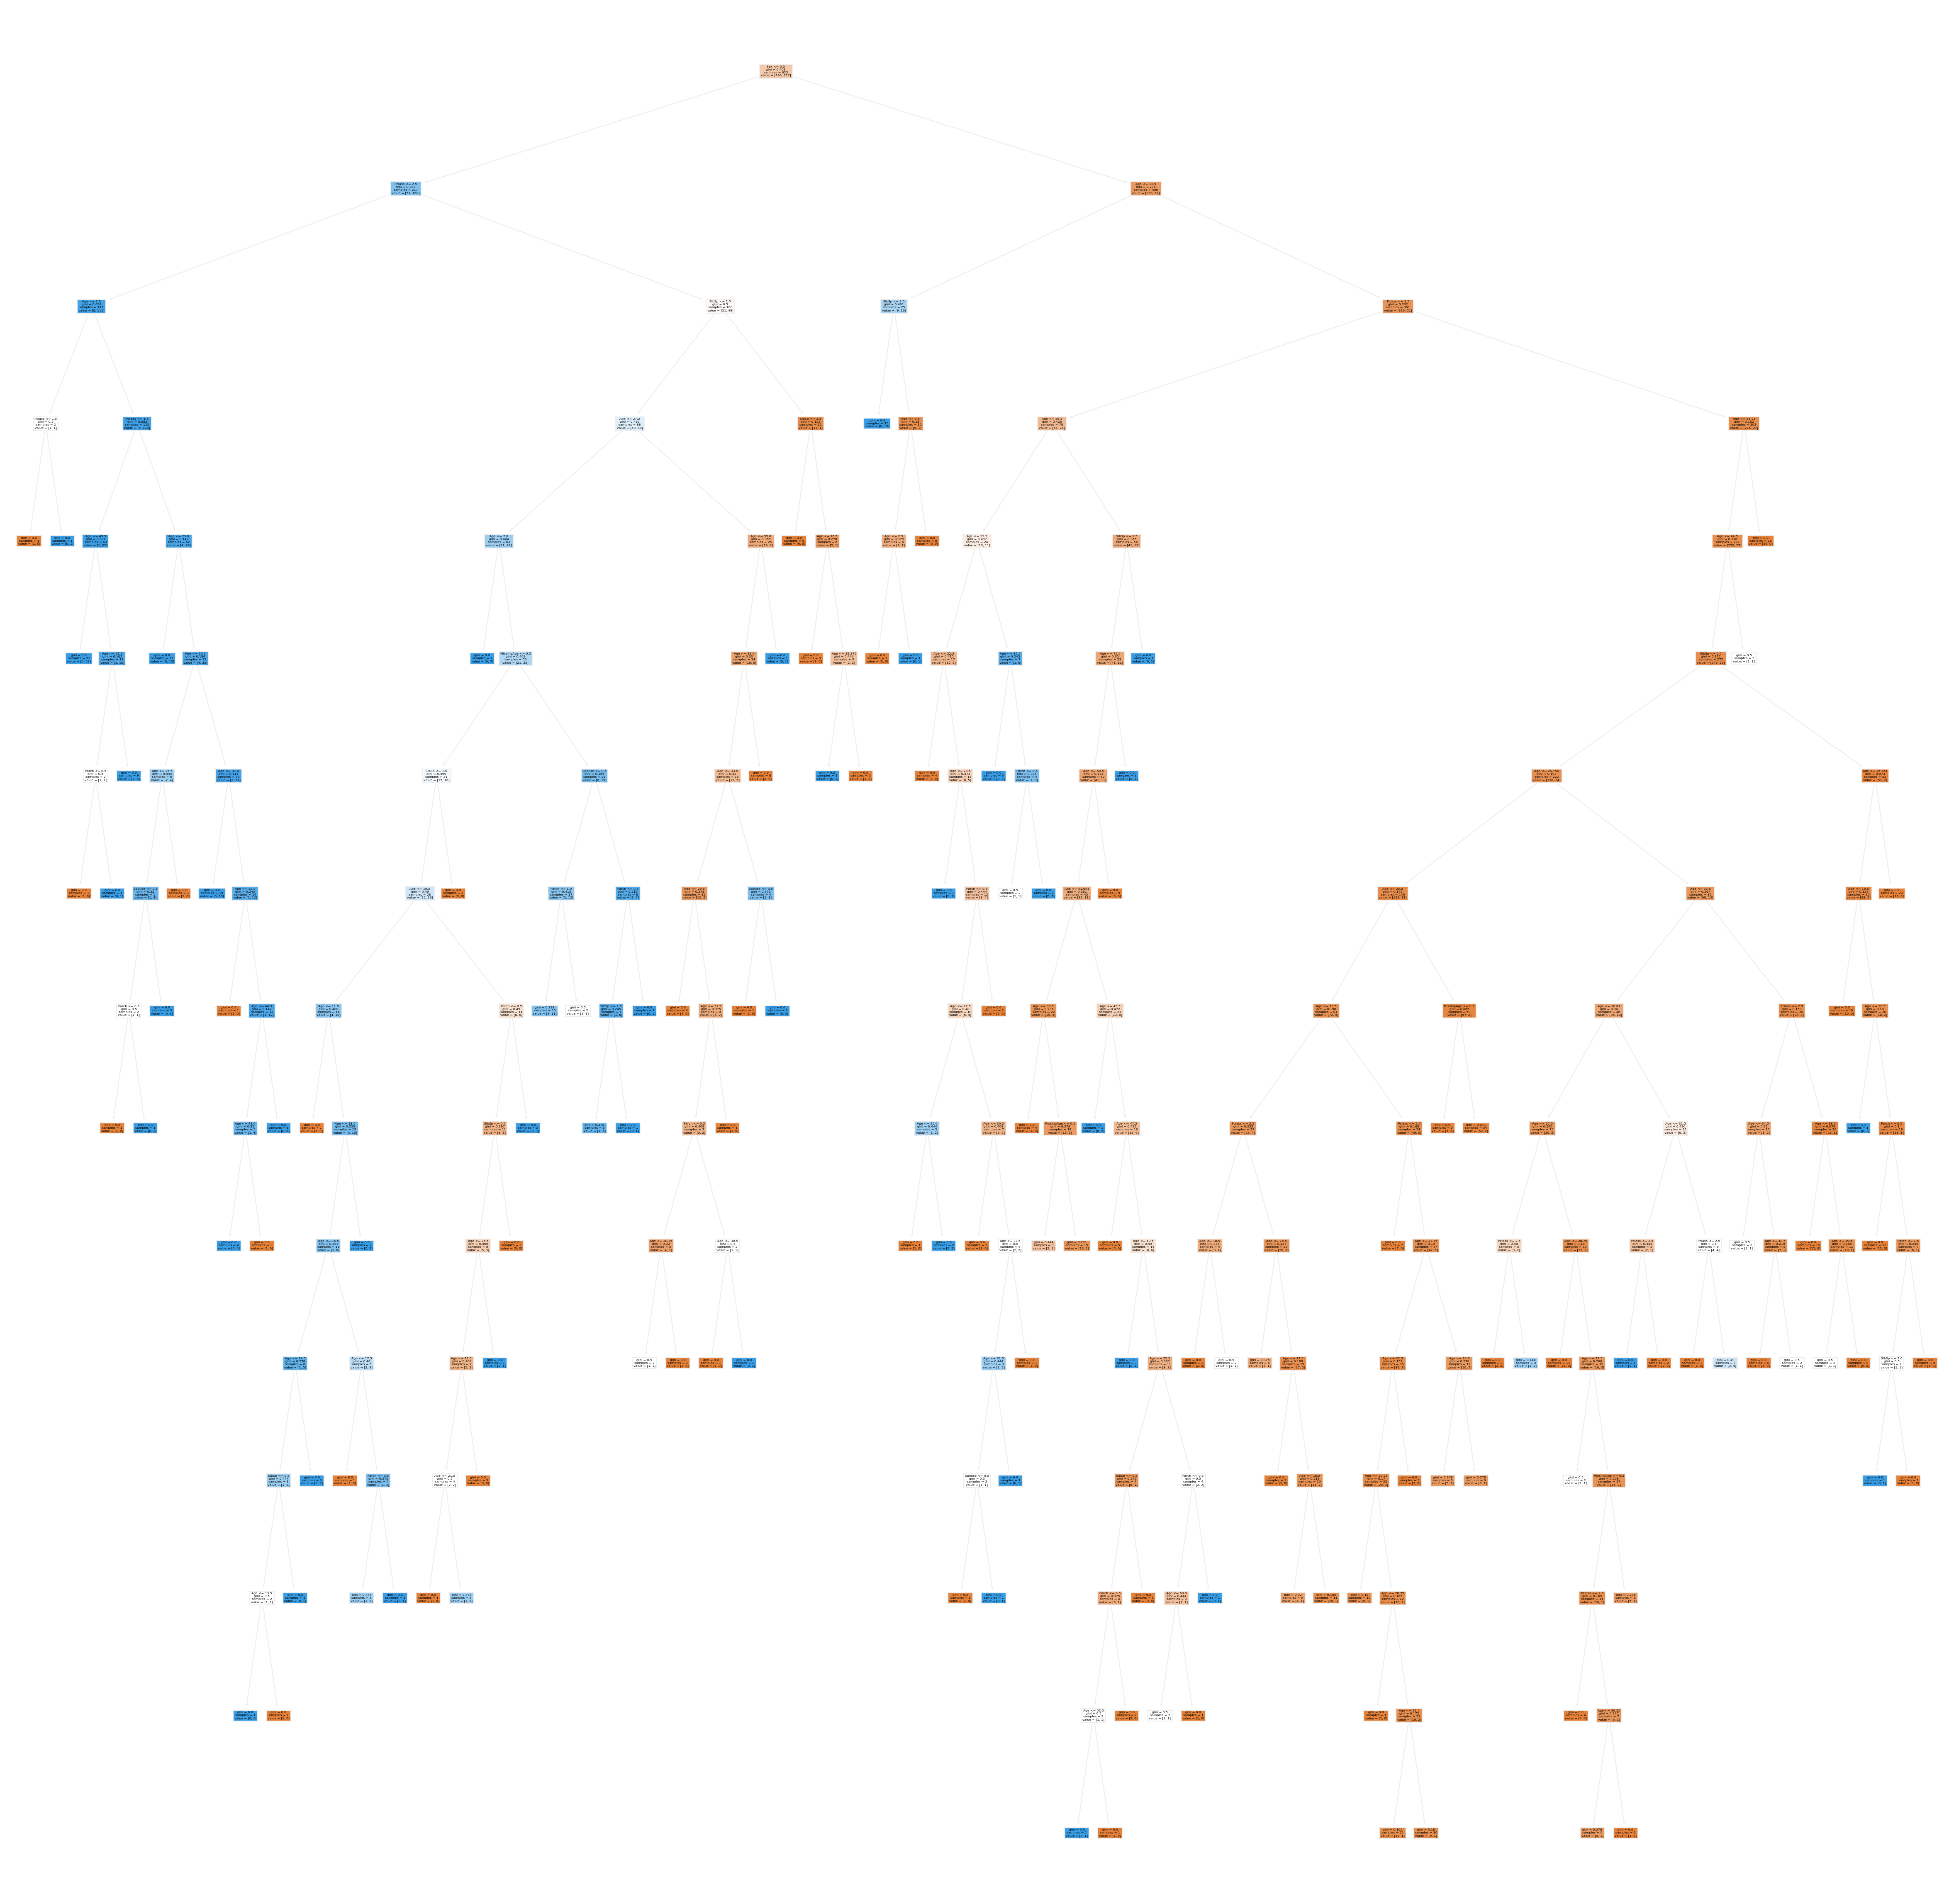

In [39]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(ctree,
               feature_names=features,
               filled = True);
fig.savefig('tree.png')

Let's make a smaller tree that's easier to interpret

In [50]:
# Create a decision tree classifier instance with a limitation on the tree depth
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth = 2)

In [51]:
# Fit the decision tree classifer
ctree.fit(train.drop('Survived', axis=1), train['Survived'])

DecisionTreeClassifier(max_depth=2, random_state=1)

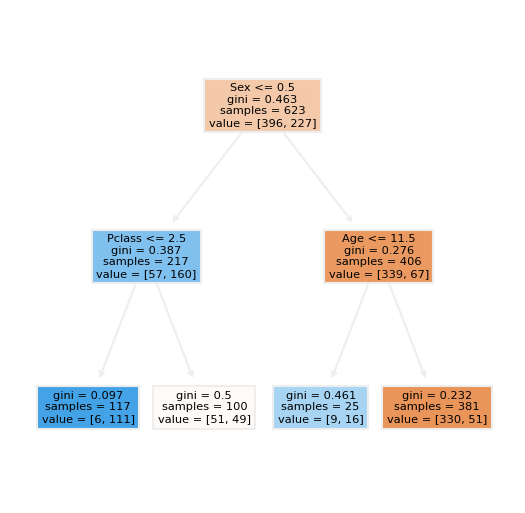

In [52]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(ctree,
               feature_names=features,
               filled = True);

* You will notice that the right side of the chart is male, which has a higher death rate, and the left side is female, which has a higher survival rate
* Notice that having a large family is correlated with a higher death rate, although these are based on small sample sizes.
* Age (12yrs) is second node for men, indicating that boys had higher suvival rates than men.
* Class (1,2 vs. 3) is second node for women, indicating that women in the first two classes had higher survival rates.

#### Evaluating Accuracy

In [53]:
# Predict what will happen for 3rd class woman
ctree.predict_proba(np.array([[3, 0, 25, 0, 0, 0, 0]]))

array([[0.51, 0.49]])

In [54]:
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'MissingAge', 'Spouse']

In [55]:
# Predict what will happen for a 1st class man
ctree.predict_proba(np.array([[1, 1, 25, 0, 0, 0, 0]]))

array([[0.86614173, 0.13385827]])

In [56]:
# Calculate in-sample accuracy
preds = ctree.predict(train.drop('Survived', axis=1))
metrics.accuracy_score(train['Survived'], preds)

0.8154093097913323

In [57]:
# Calculate out-of-sample accuracy
preds = ctree.predict(test.drop('Survived', axis=1))
metrics.accuracy_score(test['Survived'], preds)

0.7350746268656716

In [58]:
# Confusion matrix
pd.crosstab(test['Survived'], preds, rownames=['actual'], colnames=['predicted'])

predicted,0,1
actual,,
0,143,10
1,61,54


In [59]:
# Make predictions on the test set using predict_proba
probs = ctree.predict_proba(test.drop('Survived', axis=1))[:,1]

# Calculate the AUC metric
metrics.roc_auc_score(test['Survived'], probs)

0.7687695368002275

# Determining the optimal tree size

In [79]:

from sklearn.model_selection import GridSearchCV

In [87]:
depth_range = list(range(1, 20))
grid_arbol = {"max_depth":depth_range # Profundidades de 1 a 10
              }

In [88]:
ctree = tree.DecisionTreeClassifier(random_state=10)

In [89]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(ctree,
                        grid_arbol,
                        cv=5,
                        scoring="accuracy",)

grid.fit(d.drop('Survived', axis = 1), d['Survived'])

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [99]:
print("Mejor score obtenido:", grid.best_score_)
print("Con los siguientes parámetros:", grid.best_params_)

best_estim = grid.best_estimator_
print("Mejor estimador:", grid.best_estimator_)

Mejor score obtenido: 0.8182160567447117
Con los siguientes parámetros: {'max_depth': 7}
Mejor estimador: DecisionTreeClassifier(max_depth=7, random_state=10)


In [100]:
# Entreno con este estimador
best_estim.fit(train.drop('Survived', axis=1), train['Survived'])

DecisionTreeClassifier(max_depth=7, random_state=10)

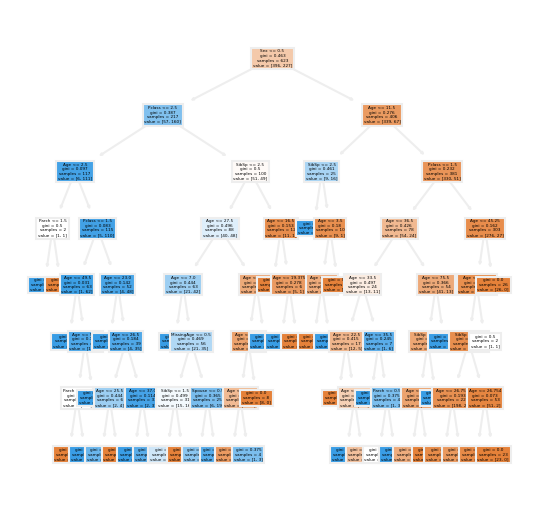

In [103]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(best_estim,
               feature_names=features,
               filled = True);

In [102]:
# Make predictions on the test set using predict_proba
probs = best_estim.predict_proba(test.drop('Survived', axis=1))[:,1]

# Calculate the AUC metric
metrics.roc_auc_score(test['Survived'], probs)

0.8104859335038364

# Strengths and Weaknesses

**Strengths**
* The nature of its output provides the decision tree algorithm with a degree of interpretability that other more complex algorithms don’t provide
* Understanding how decision trees work is foundational to understanding how more complex, and widely-used models work.


**Weaknesses**
* The decision tree tends to perform worse than more sophisticated modeling techniques due to their unstability
* Decision trees require tuning to avoid overfitting

# Documentation
* Documentation for [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 
* Check out the documentation for `max_features`, `max_leaf_nodes`, and `splitter` for additional flexibility in fitting the model
* Scikit Learn provides an implementation for continuous outputs:  [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) 

# Resources
* Chapter 8.1 of An Introduction to Statistical Learning also covers the basics of Classification and Regression Trees
* The scikit-learn [documentation](http://scikit-learn.org/stable/modules/tree.html) has a detailed tutorial that includes a discussion of the strengths and weaknesses of Trees.
* For those of you with background in javascript, d3.js has a nice tree layout that would make more presentable tree diagrams:
   * Here is a link to a [static version](http://bl.ocks.org/mbostock/4339184), as well as a link to a [dynamic version](http://bl.ocks.org/mbostock/4339083) with collapsable nodes.
   * If this is something you are interested in, Gary Sieling wrote a nice [function](http://www.garysieling.com/blog/rending-scikit-decision-trees-d3-js) in python to take the output of a scikit-learn tree and convert into json format.
   * If you are intersted in learning d3.js, this a good [tutorial](http://www.d3noob.org/2014/01/tree-diagrams-in-d3js_11.html) for understanding the building blocks of a decision tree. Here is another [tutorial](http://blog.pixelingene.com/2011/07/building-a-tree-diagram-in-d3-js/) focusing on building a tree diagram in d3.js.
* Dr. Justin Esarey from Rice University has a nice [video lecture](https://www.youtube.com/watch?v=HW7Aib842Oo&hd=1) on CART that also includes an [R code walkthrough](http://jee3.web.rice.edu/cart-and-random-forests.r)